In [2]:
#Importacion librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
from scipy.fftpack import ifft

In [3]:
#Importacion de datos
datosSignal = np.genfromtxt("signal.dat",delimiter=",")
datosIncompletos = np.genfromtxt("incompletos.dat",delimiter=",")

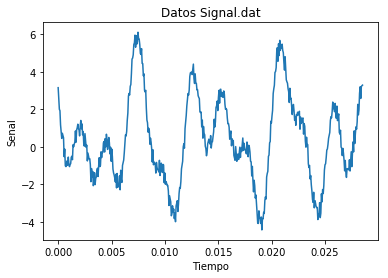

In [4]:
#Ploteo datos signal
plt.figure()
datosSignalX = datosSignal[:,0]
datosSignalY = datosSignal[:,1]
plt.plot(datosSignalX,datosSignalY)
plt.title("Datos Signal.dat")
plt.ylabel("Senal")
plt.xlabel("Tiempo")
plt.savefig("DuarteJohn_signal.pdf",bbox_inches="tight")

In [5]:
#DFT
def furierDiscreto(datosy):
    N = len(datosy)
    dft = np.zeros([len(datosy)],dtype=complex)
    Z = np.exp(-2j*np.pi/N)
    for n in range(N):
        valorn = 0*np.exp(1j)
        for k in range(N):
            valorn+=(Z**(n*k))*datosy[k]
        dft[n]=valorn
    return dft

Se obtiene por implementacion propia las frecuencias


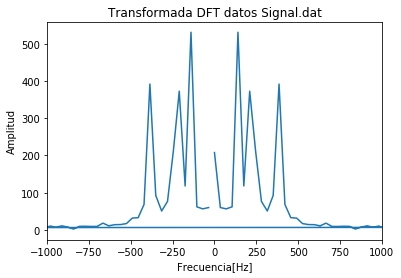

In [6]:
#Ploteo transformada de furier de datosSignal
dft=furierDiscreto(datosSignalY)
pf = (1/(datosSignalX[1]-datosSignalX[0]))
freq = np.concatenate((np.linspace(0,pf,len(datosSignalY))[0:256],np.linspace(-pf,0,len(datosSignalY))[255:511]))
#Ploteo datos signal
plt.figure()
plt.plot(freq,abs(dft))
plt.title("Transformada DFT datos Signal.dat")
plt.ylabel("Amplitud")
plt.xlabel("Frecuencia[Hz]")
plt.xlim([-1000,1000])
plt.savefig("DuarteJohn_TF.pdf",bbox_inches="tight")
print("Se obtiene por implementacion propia las frecuencias")

In [10]:
#Frecuencias principales
print("Las frecuencias principales son:")
print(freq[dft>100])

Las frecuencias principales son:
[   0.          140.2739726   245.47945205  385.75342466 -385.75342466
 -245.47945205 -140.2739726 ]


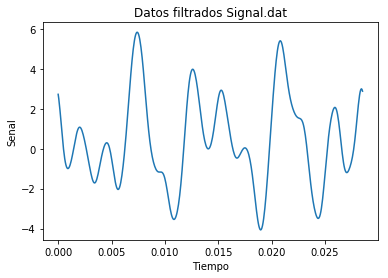

In [175]:
#Filtro y obtencion grafica filtrada datos signal
fc=1000
dft[abs(freq)>fc]=0
funTiempo=ifft(dft)
plt.figure()
plt.plot(datosSignalX,np.real(funTiempo))
plt.title("Datos filtrados Signal.dat")
plt.ylabel("Senal")
plt.xlabel("Tiempo")
plt.savefig("DuarteJohn_filtrada.pdf",bbox_inches="tight")

Text(0.5,0,'Tiempo')

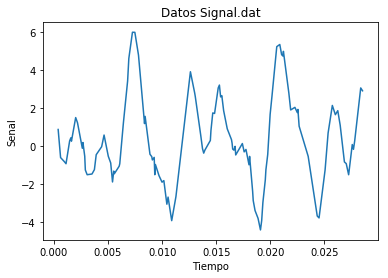

In [254]:
#Datos incompletos
datosIX = datosIncompletos[:,0]
datosIY = datosIncompletos[:,1]
plt.plot(datosIX,datosIY)
plt.title("Datos Signal.dat")
plt.ylabel("Senal")
plt.xlabel("Tiempo")

In [253]:
#Ploteo transformada de furier de datosSignal
print("No se puede obtener la transformada de Furier de esta senal, debido a que la tasa de muestreo de datos es muy pequena. La cantidad de puntos no es suficiente para transformar la senal correctamente")

No se puede obtener la transformada de Furier de esta senal, debido a que la tasa de muestreo de datos es muy pequena. La cantidad de puntos no es suficiente para transformar la senal correctamente


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


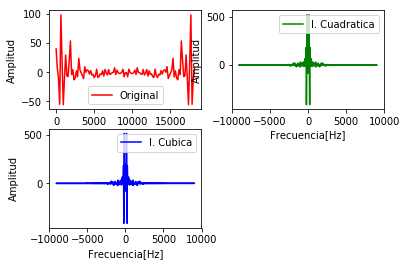

In [229]:
fcuadratic = interpolate.interp1d(datosIX,datosIY,kind = "quadratic")
fcubic = interpolate.interp1d(datosIX,datosIY,kind = "cubic")

datosX = np.linspace(datosIX[0],datosIX[-1],512)
datosYfcuadra = fcuadratic(datosX)
datosYfcubic = fcubic(datosX)

dftO=furierDiscreto(datosIY)
dftCua=furierDiscreto(datosYfcuadra)
dftCub=furierDiscreto(datosYfcubic)
pf = (1/(datosX[1]-datosX[0]))
freqO = np.concatenate((np.linspace(0,pf,len(datosIX))[0:256],np.linspace(-pf,0,len(datosIX))[255:511]))
freq = np.concatenate((np.linspace(0,pf,len(datosX))[0:256],np.linspace(-pf,0,len(datosX))[255:511]))


plt.figure()
plt.subplot(221)
plt.plot(freqO,dftO,"r",label="Original")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Frecuencia[Hz]")
plt.subplot(222)
plt.plot(freq,dftCua,"g",label="I. Cuadratica")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Frecuencia[Hz]")
plt.subplot(223)
plt.plot(freq,dftCub,"b",label="I. Cubica")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Frecuencia[Hz]")
plt.savefig("DuarteJohn_TF_interpola.pdf",bbox_inches="tight")

In [230]:
#Descripcion diferencias entre graficas
print("Como se observa en la grafica de la transformada de furier para los datos incompletos originales y sus interpolaciones, se evidencia que el aumento en cantidad de datos provee una grafica acorde, tanto en interpolacion cuadratica como cubica, mientras que en el caso de la grafica original no se tiene un patron de la grafica")

Como se observa en la grafica de la transformada de furier para los datos incompletos originales y sus interpolaciones, se evidencia que el aumento en cantidad de datos provee una grafica acorde, tanto en interpolacion cuadratica como cubica, mientras que en el caso de la grafica original no se tiene un patron de la grafica


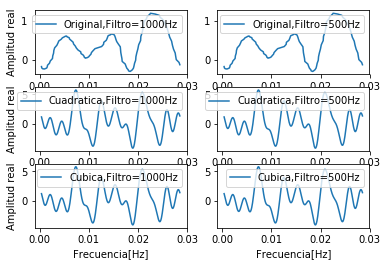

In [252]:
## Filtro fc = 1000Hz
fc=1000
dftO[abs(freqO)>fc]=0
funTiempoO1=ifft(dftO)
dftCua[abs(freq)>fc]=0
funTiempoCua1=ifft(dftCua)
dftCub[abs(freq)>fc]=0
funTiempoCub1=ifft(dftCub)

#Filtro fc = 500Hz
fc=500
dftO[abs(freqO)>fc]=0
funTiempoO2=ifft(dftO)
dftCua[abs(freq)>fc]=0
funTiempoCua2=ifft(dftCua)
dftCub[abs(freq)>fc]=0
funTiempoCub2=ifft(dftCub)

plt.figure()
plt.subplot(321)
plt.plot(datosIX,np.real(funTiempoO1),label="Original,Filtro=1000Hz")
plt.ylabel("Amplitud real")
plt.legend()

plt.subplot(322)
plt.plot(datosIX,np.real(funTiempoO2),label="Original,Filtro=500Hz")
plt.legend()

plt.subplot(323)
plt.plot(datosX,np.real(funTiempoCua1),label="Cuadratica,Filtro=1000Hz")
plt.ylabel("Amplitud real")
plt.legend()

plt.subplot(324)
plt.plot(datosX,np.real(funTiempoCua2),label="Cuadratica,Filtro=500Hz")
plt.legend()

plt.subplot(325)
plt.plot(datosX,np.real(funTiempoCub1),label="Cubica,Filtro=1000Hz")
plt.legend()
plt.ylabel("Amplitud real")
plt.xlabel("Frecuencia[Hz]")

plt.subplot(326)
plt.plot(datosX,np.real(funTiempoCub2),label="Cubica,Filtro=500Hz")
plt.xlabel("Frecuencia[Hz]")
plt.legend()

plt.savefig("DuarteJohn_2Filtros.pdf",bbox_inches="tight")